# Glass Identification Project

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [5]:
#load dataset
data = pd.read_csv('glass.csv')
data.head(2)

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [7]:
# check the shape of dataframe
data.shape

(213, 10)

This dataset having 213 rows and 10 columns.

In [8]:
n = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
data.columns = n
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [10]:
# count the number of types present in the type of glass.
data['Type of glass'].value_counts()

Type of glass
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<Axes: xlabel='Type of glass', ylabel='count'>

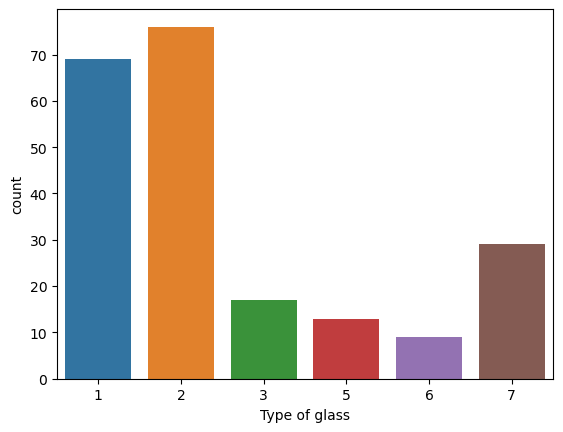

In [11]:
#graphical representation 
sns.countplot(x = 'Type of glass', data = data)

Here we observed that column 1 and 2 are having more number of value as compare to other types.

In [12]:
# statistic of the data
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Here in some column like mg, Ai, Si, Ba having some outliers lets check with the data distribution.

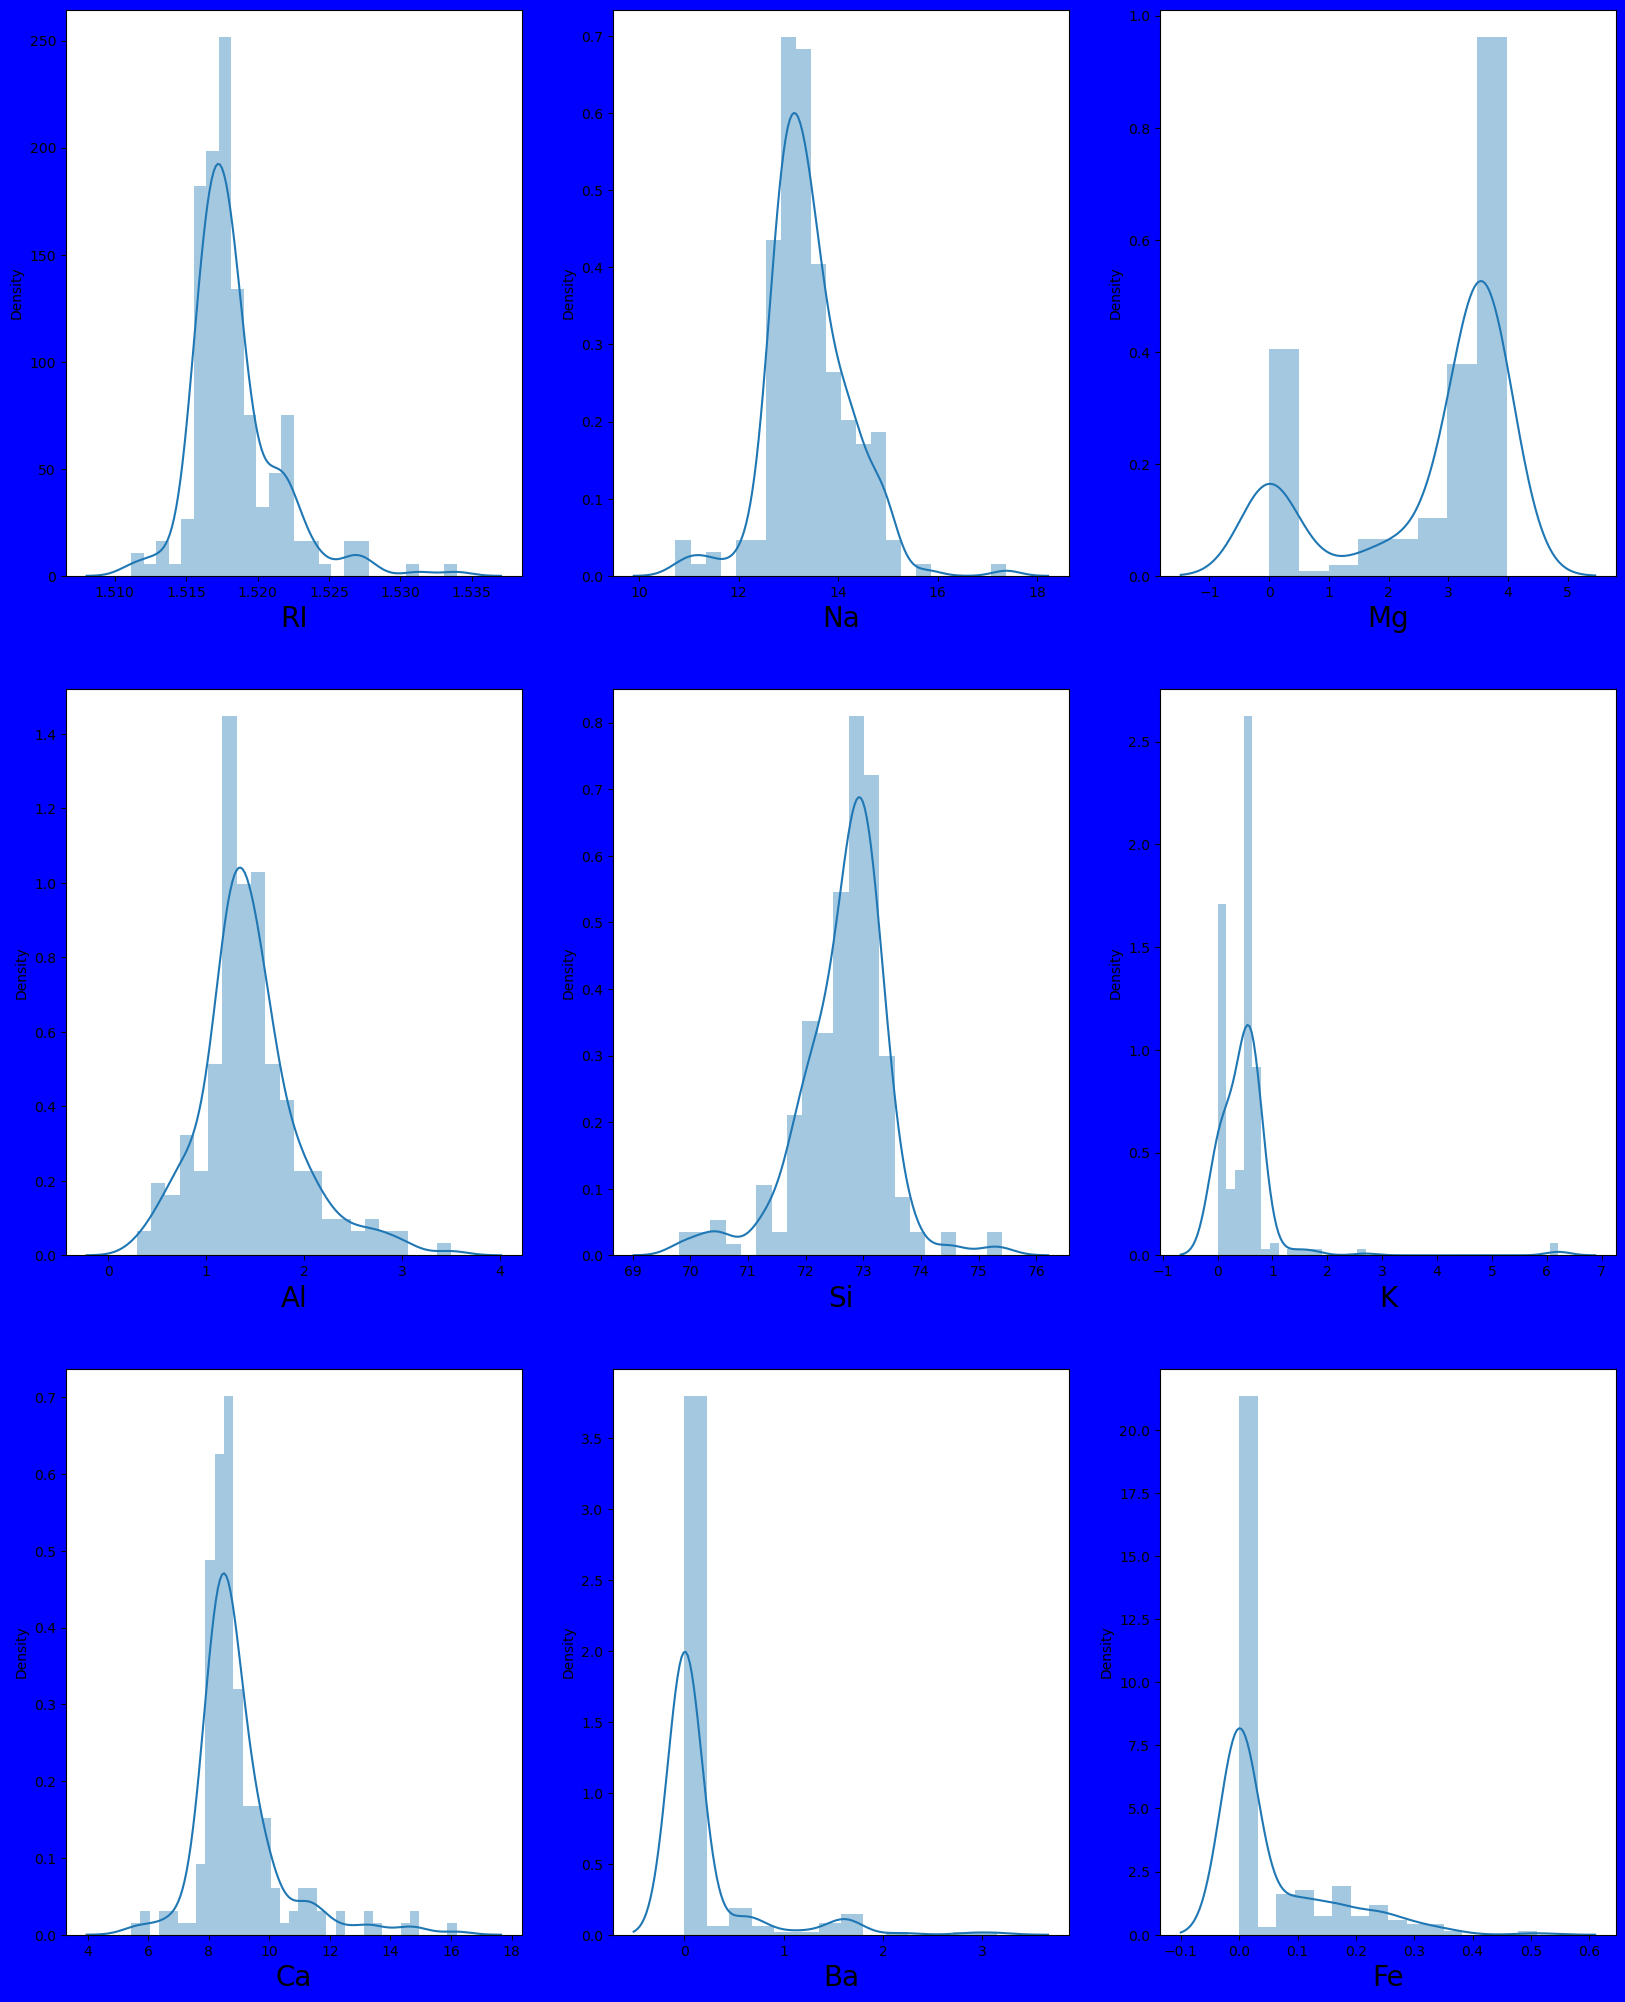

In [13]:
# check the skewness
plt.figure(figsize = (20 ,25),facecolor = 'blue')
plotnumber = 1

for column in data:
    if plotnumber <= 9: #as there are 9 column
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

 Here all the columns are skweed in either positive side or in a negative side.

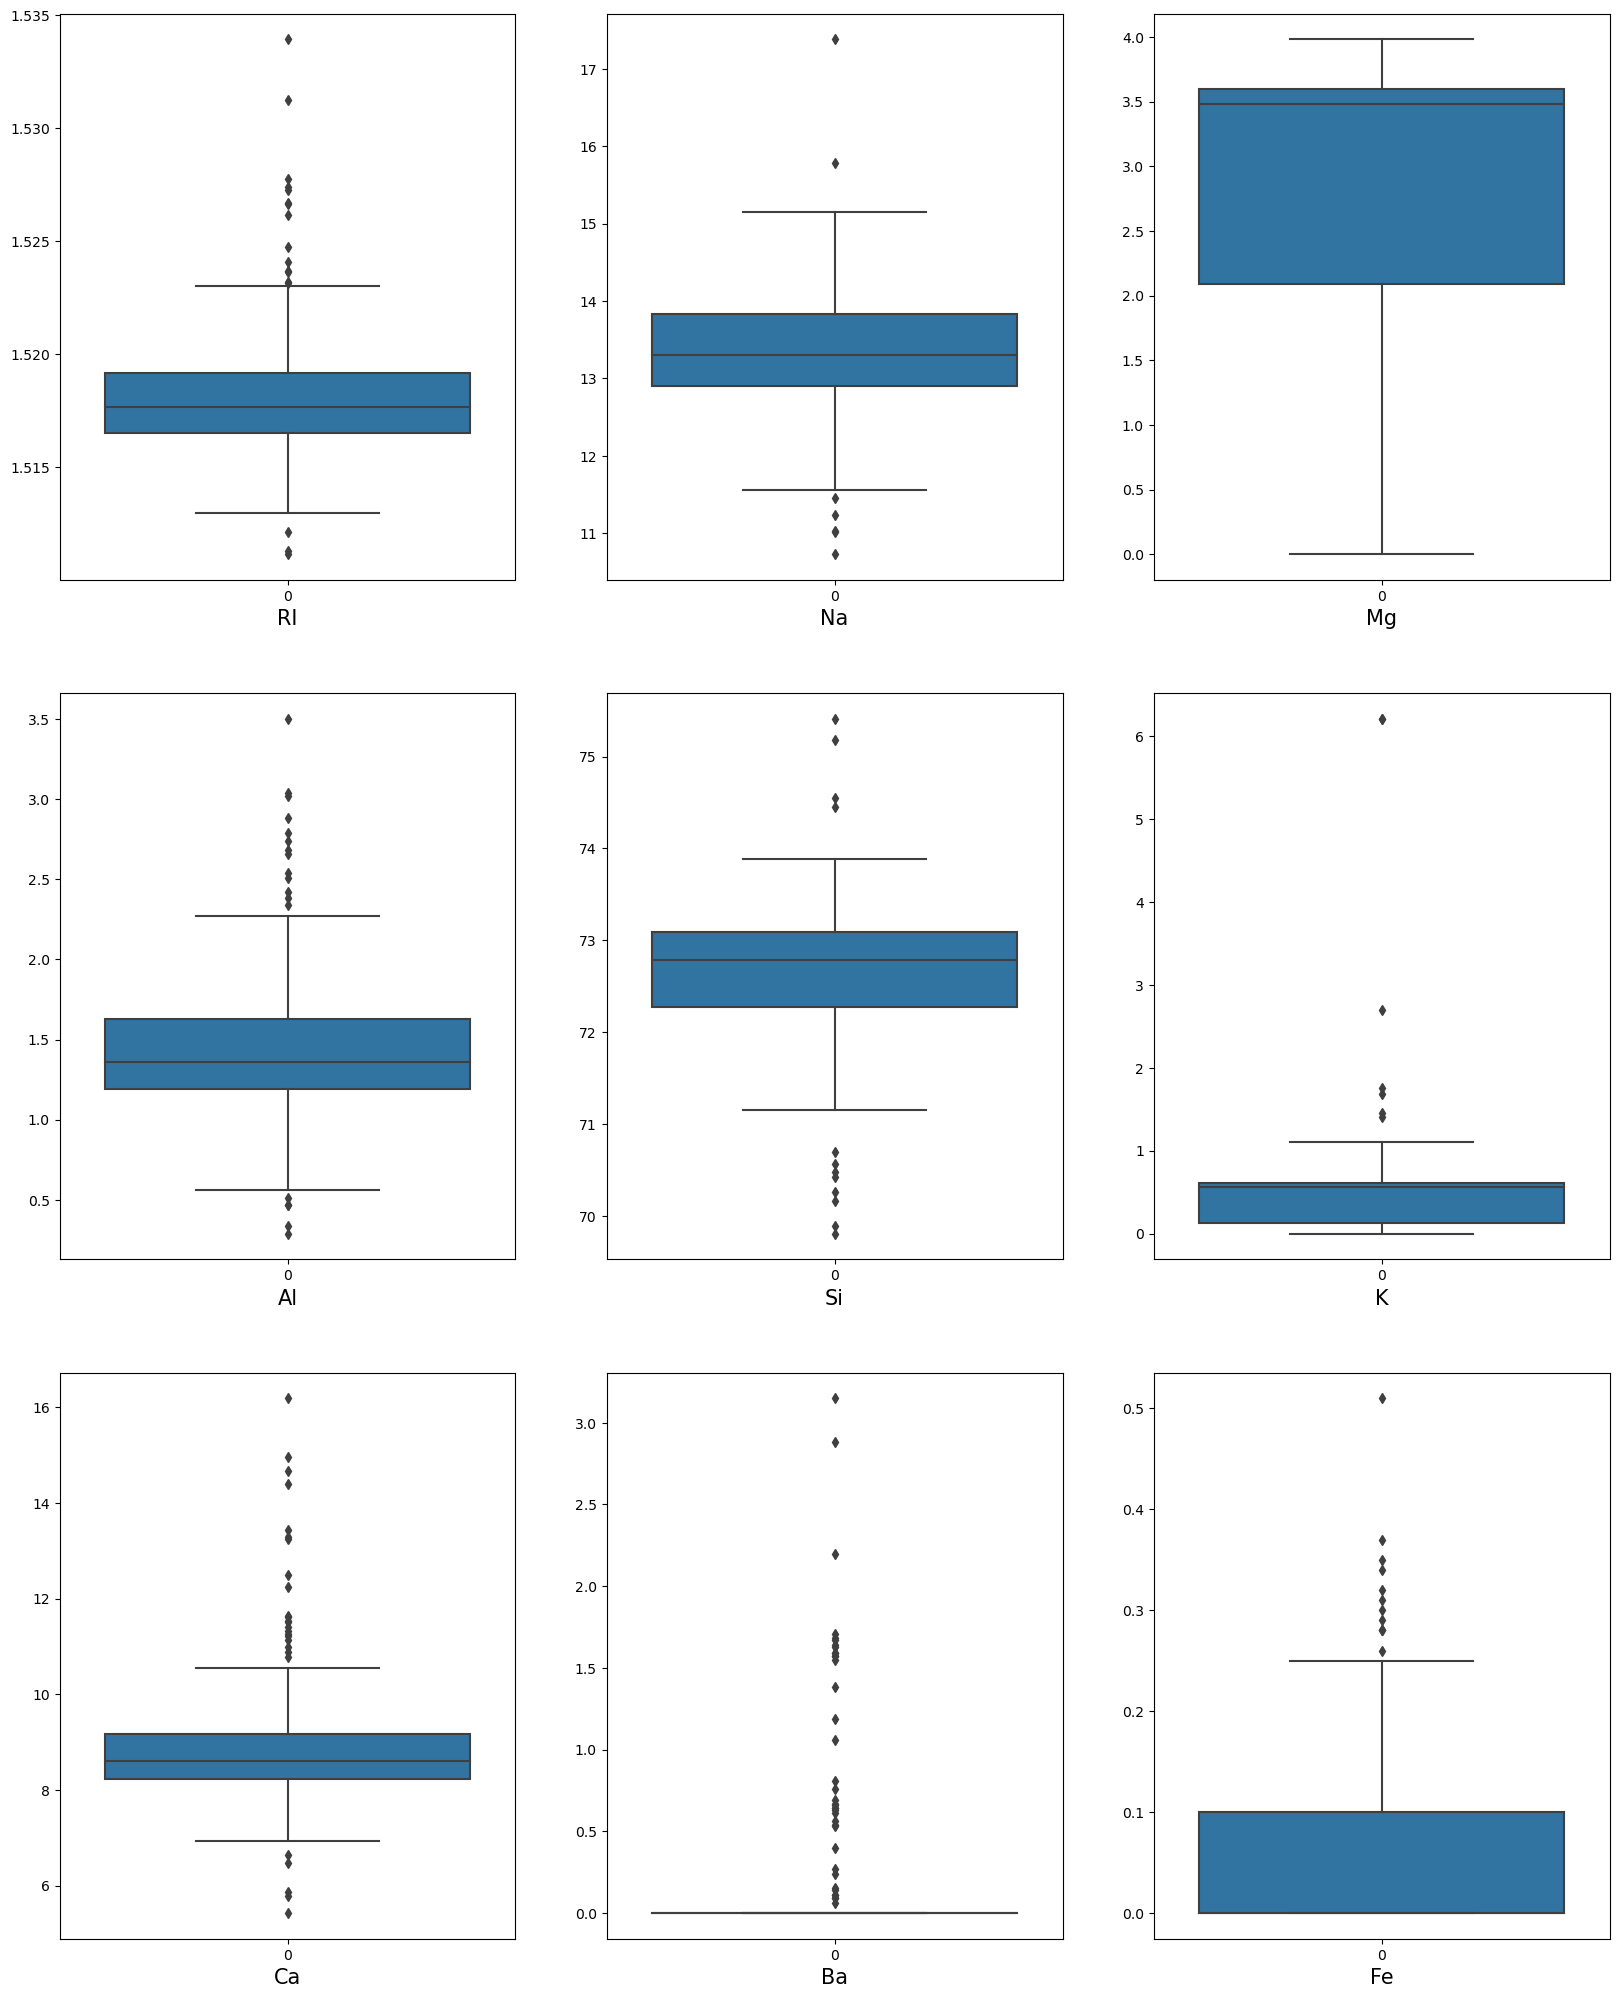

In [15]:
#visualize the outliers using boxplot
plt.figure(figsize = (20,25))
graph = 1

for column in data:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax = sns.boxplot(data = data[column])
        plt.xlabel(column, fontsize = 15)
    graph+=1
plt.show()

In [17]:
#Checking Outlines through Z-score
from scipy import stats

z = abs(stats.zscore(data))

#np.where(z > 3)

data = data[(z < 3).all(axis=1)]

data.shape

(193, 10)

# Co-relation

<Axes: >

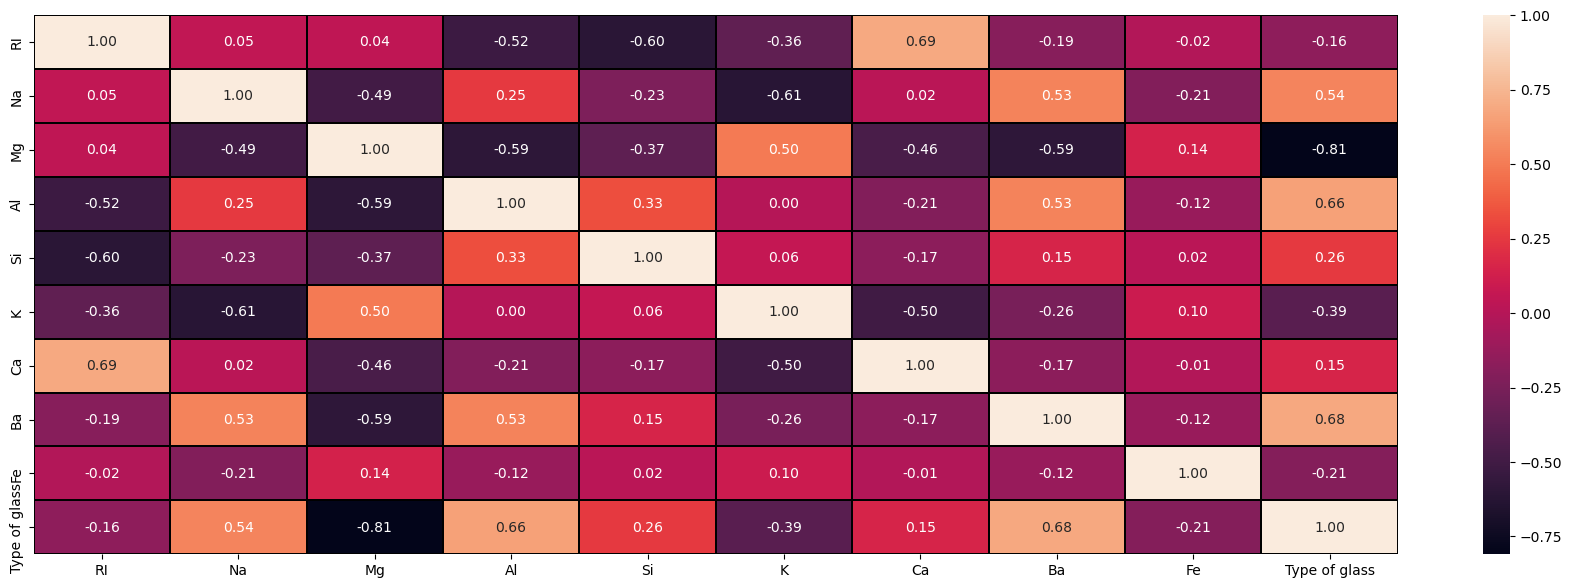

In [18]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

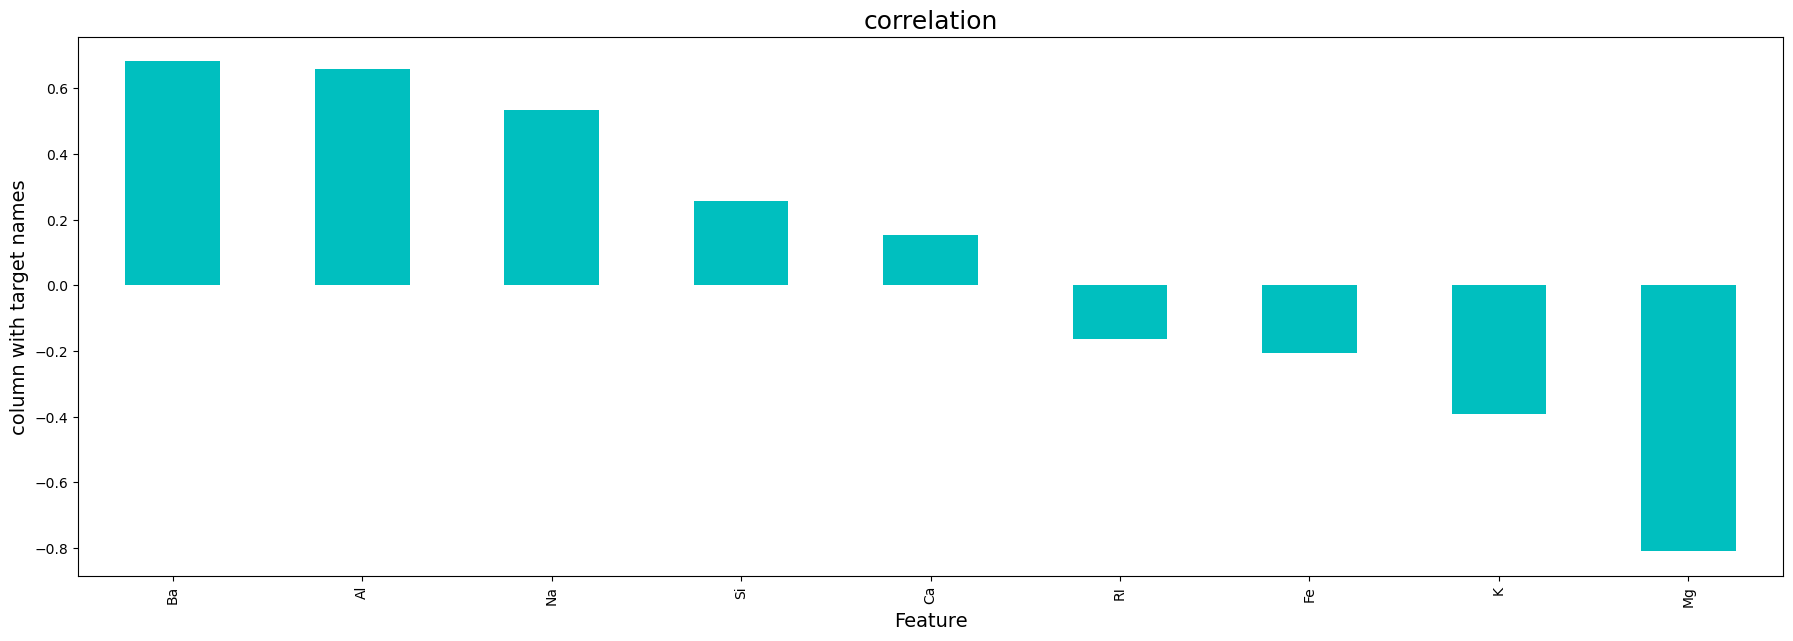

In [20]:
plt.figure(figsize=(22,7))
data.corr()['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

As we can see here that Ba, Al, Na, Si and Ca having positive corelation with type of glass.

# Seprating Data into feature and label

In [21]:
X = data.drop(['Type of glass'],axis=1)
y = data['Type of glass']

In [22]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: Type of glass, Length: 193, dtype: int64

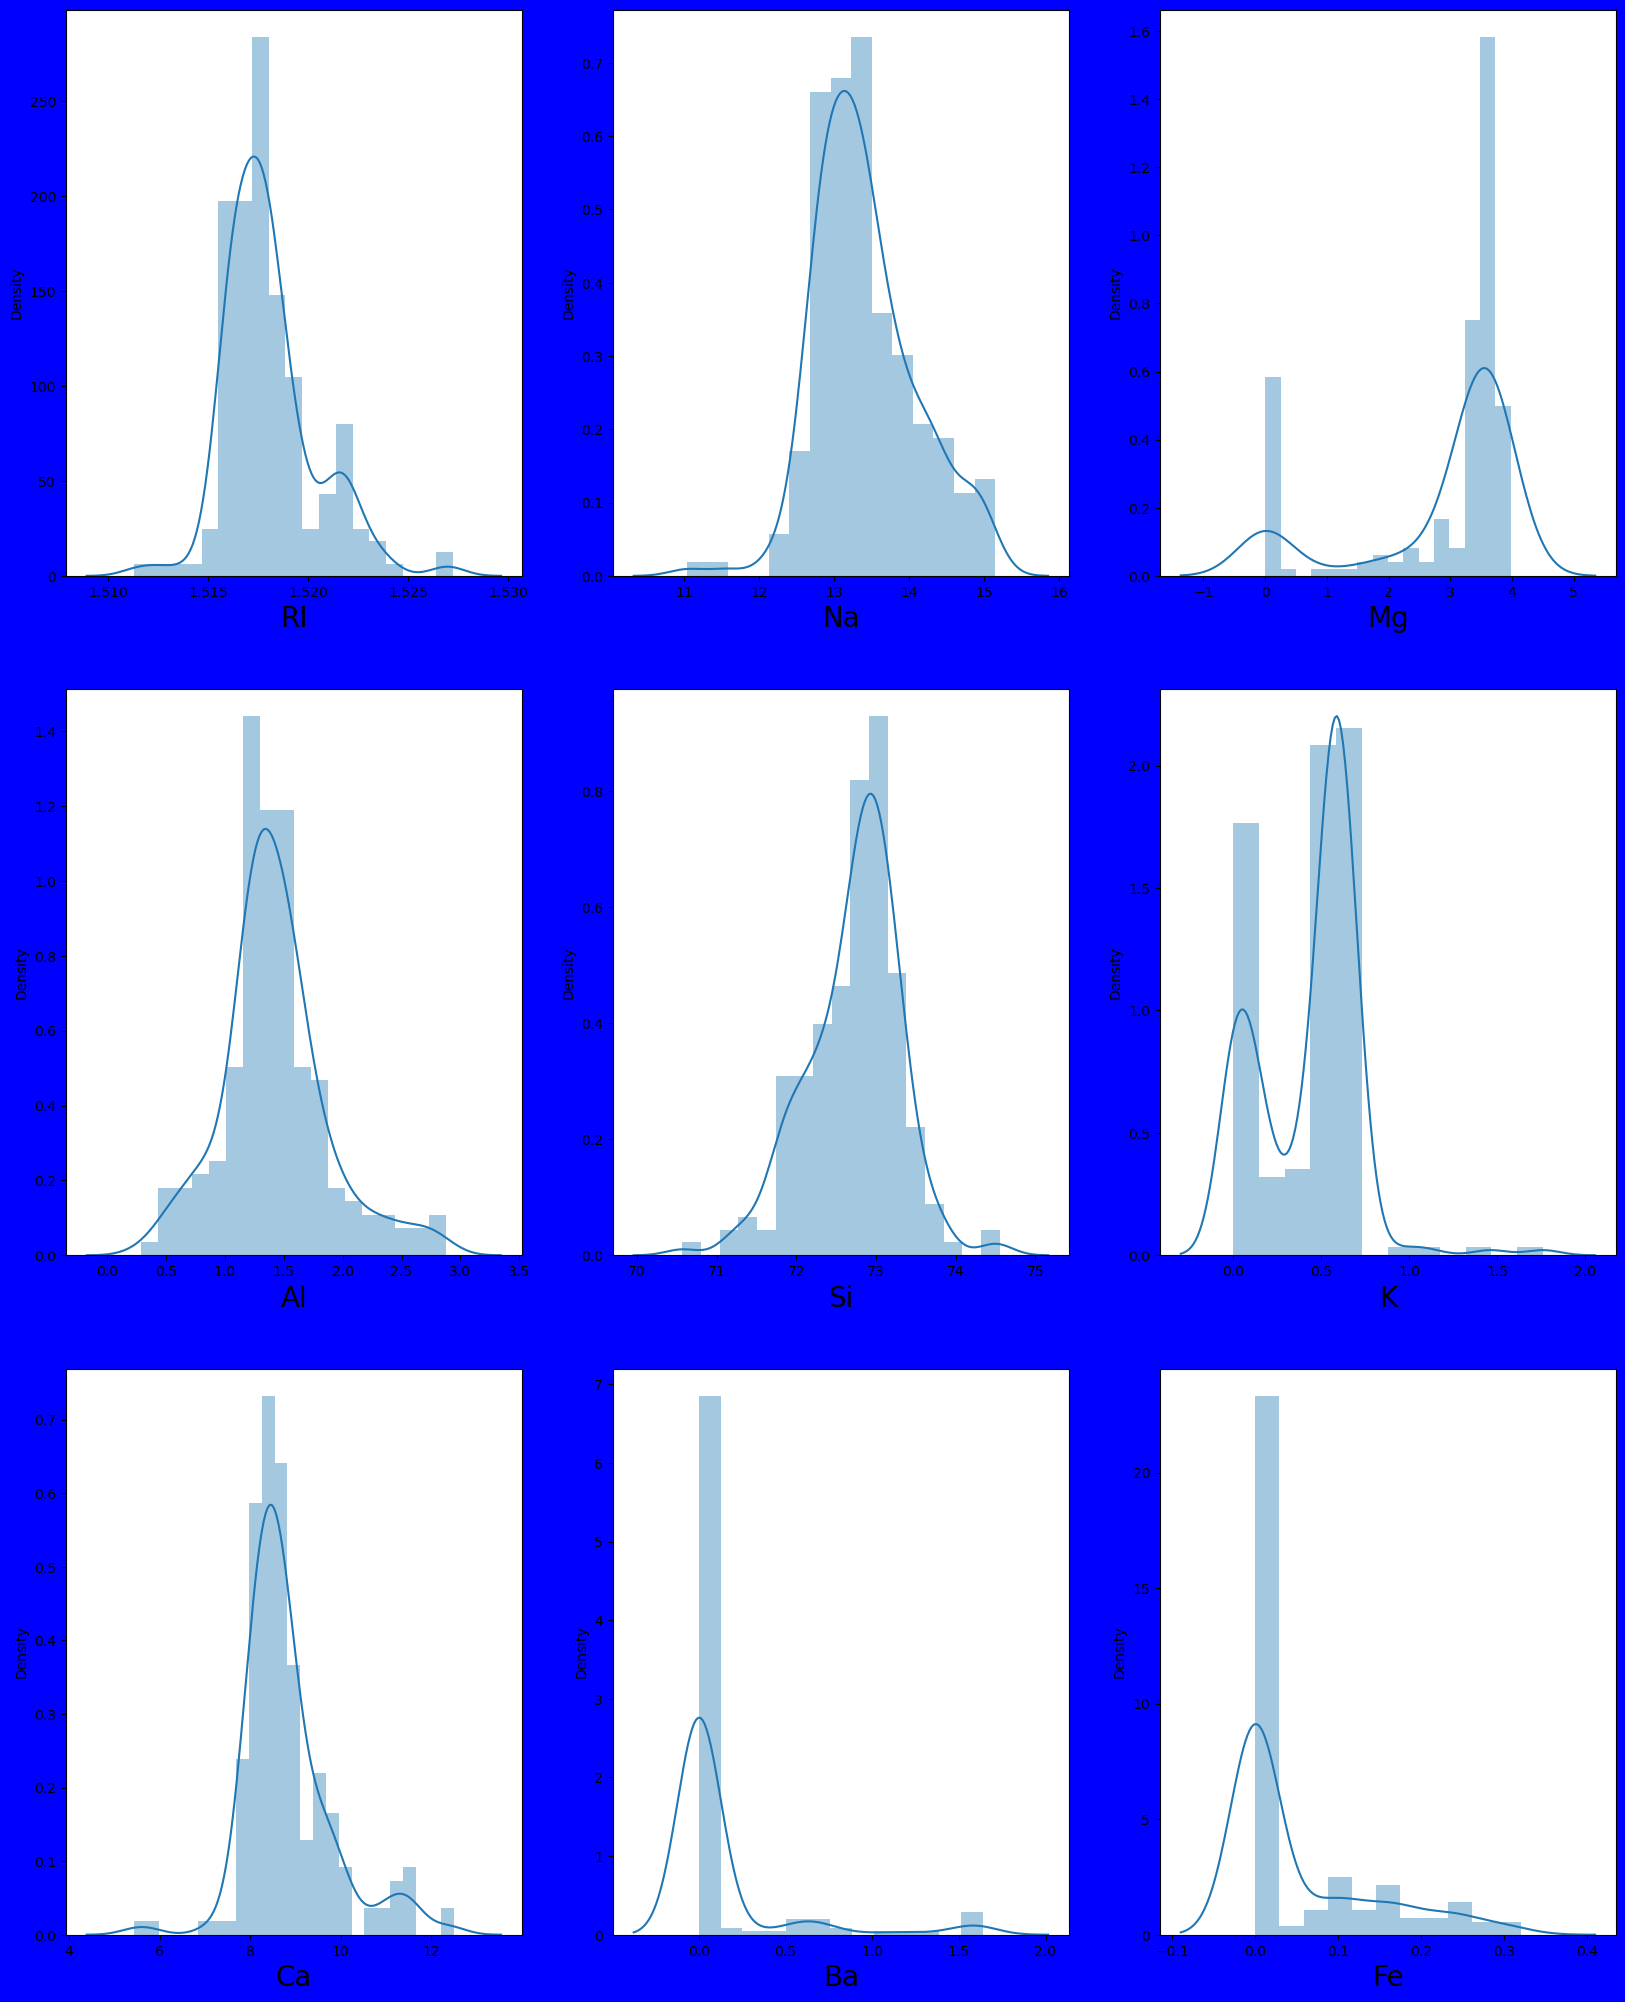

In [24]:
plt.figure(figsize = (20 ,25),facecolor = 'blue')
plotnumber = 1

for column in X:
    if plotnumber <= 9: #as there are 9 column
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

# Scaling data using standard scaler

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled.shape[1]

9

In [27]:
X_scaled

array([[-0.19147536,  0.70449765,  0.55873842, ..., -1.00595153,
        -0.34729599, -0.60518691],
       [-0.81909158,  0.16965831,  0.52038155, ..., -1.05650055,
        -0.34729599, -0.60518691],
       [-0.16953074, -0.30575444,  0.6277808 , ..., -0.61166924,
        -0.34729599, -0.60518691],
       ...,
       [-0.52503363,  2.23473244, -2.20295651, ..., -0.4296928 ,
         4.10630709, -0.60518691],
       [ 1.14275771,  1.40276013, -2.20295651, ..., -0.38925359,
         4.2463575 , -0.60518691],
       [-0.67425707,  1.43247343, -2.20295651, ..., -0.34881438,
         4.05028693, -0.60518691]])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=120)

# Model Building

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [31]:
test_pred = lr.predict(x_test)
test_pred

array([1, 5, 2, 2, 2, 2, 1, 7, 2, 1, 1, 1, 2, 2, 1, 1, 5, 2, 2, 1, 3, 7,
       6, 2, 7, 2, 2, 2, 1, 3, 1, 1, 2, 2, 1, 2, 1, 1, 5], dtype=int64)

In [32]:
train_pred = lr.predict(x_train)
train_pred

array([1, 2, 3, 2, 2, 1, 2, 7, 2, 2, 1, 2, 2, 2, 7, 1, 1, 1, 6, 2, 2, 7,
       2, 5, 1, 2, 1, 7, 7, 1, 7, 7, 1, 1, 2, 1, 2, 2, 2, 7, 2, 2, 1, 2,
       1, 1, 1, 2, 6, 1, 1, 2, 7, 7, 2, 1, 1, 2, 3, 1, 1, 7, 1, 1, 7, 1,
       1, 1, 2, 2, 5, 6, 1, 1, 1, 6, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       5, 1, 7, 7, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 6, 2, 1, 1, 5, 7, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 3, 1, 6, 2, 5, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 3, 7, 7, 7, 1, 2, 3, 1, 2, 2, 2, 7, 2, 1, 1, 1, 1, 5, 2, 6],
      dtype=int64)

In [33]:
# function we are using for all the model for checking metrics
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2))

In [34]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # Testing Score



===============================Train Result=============================
Accuracy score :  71.43%

===============================Test Result===============================
Accuracy Scorre :  71.79%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.71      0.77      0.74        13
           2       0.69      0.69      0.69        16
           3       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.72        39
   macro avg       0.73      0.70      0.71        39
weighted avg       0.73      0.72      0.72        39



In [35]:
predlr = lr.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 71.7948717948718
[[10  3  0  0  0  0]
 [ 3 11  2  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        13
           2       0.69      0.69      0.69        16
           3       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.72        39
   macro avg       0.73      0.70      0.71        39
weighted avg       0.73      0.72      0.72        39



# Random forest classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print('Test Accuracy', accuracy_score(y_test,predrf)*100)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Test Accuracy 79.48717948717949
[[11  1  1  0  0  0]
 [ 3 13  0  0  0  0]
 [ 1  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.69      0.85      0.76        13
           2       0.87      0.81      0.84        16
           3       0.50      0.50      0.50         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.79        39
   macro avg       0.84      0.76      0.79        39
weighted avg       0.82      0.79      0.80        39



In [37]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  79.49%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.69      0.85      0.76        13
           2       0.87      0.81      0.84        16
           3       0.50      0.50      0.50         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.79        39
   macro avg       0.84      0.76      0.79        39
weighted avg       0.82      0.79      0.80        39



# Decision tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
pred_traindt=dt.predict(x_train)
print('Test Accuracy', accuracy_score(y_test,preddt)*100)
print('Train Accuracy', accuracy_score(y_train,pred_traindt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 66.66666666666666
Train Accuracy 100.0
[[11  1  1  0  0  0]
 [ 4 10  1  0  1  0]
 [ 1  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 1  0  0  0  0  0]
 [ 2  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.83      0.62      0.71        16
           3       0.33      0.50      0.40         2
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         4

    accuracy                           0.67        39
   macro avg       0.62      0.52      0.54        39
weighted avg       0.73      0.67      0.67        39



In [39]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  66.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.83      0.62      0.71        16
           3       0.33      0.50      0.40         2
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         4

    accuracy                           0.67        39
   macro avg       0.62      0.52      0.54        39
weighted avg       0.73      0.67      0.67        39



# SVC

In [40]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print('Test Accuracy', accuracy_score(y_test,predsvc)*100)

print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Test Accuracy 74.35897435897436
[[13  0  0  0  0  0]
 [ 4 12  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 1  1  0  0  0  2]]
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        13
           2       0.75      0.75      0.75        16
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         4

    accuracy                           0.74        39
   macro avg       0.57      0.49      0.50        39
weighted avg       0.72      0.74      0.71        39



In [41]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True) # Training Score

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # Testing Score


===============================Train Result=============================
Accuracy score :  78.57%

===============================Test Result===============================
Accuracy Scorre :  74.36%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.68      1.00      0.81        13
           2       0.75      0.75      0.75        16
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         4

    accuracy                           0.74        39
   macro avg       0.57      0.49      0.50        39
weighted avg       0.72      0.74      0.71        39



# Cross validation of the model

In [42]:
train_accuracy = r2_score(y_train, train_pred)
test_accuracy = r2_score(y_test, test_pred)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf, X, y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and the accuracy for testing is {test_accuracy}")
    print('\n')

At cross fold 2 the cv score is 0.5437607388316151 and accuracy score for training is 0.8903232925079996and the accuracy for testing is 0.7389926030292358


At cross fold 3 the cv score is 0.7098557692307693 and accuracy score for training is 0.8903232925079996and the accuracy for testing is 0.7389926030292358


At cross fold 4 the cv score is 0.730654761904762 and accuracy score for training is 0.8903232925079996and the accuracy for testing is 0.7389926030292358


At cross fold 5 the cv score is 0.7304993252361675 and accuracy score for training is 0.8903232925079996and the accuracy for testing is 0.7389926030292358


At cross fold 6 the cv score is 0.7051767676767676 and accuracy score for training is 0.8903232925079996and the accuracy for testing is 0.7389926030292358


At cross fold 7 the cv score is 0.7093726379440667 and accuracy score for training is 0.8903232925079996and the accuracy for testing is 0.7389926030292358


At cross fold 8 the cv score is 0.7466666666666667 and accu

At the cross fold 9  we are getting better result as compare to other.

# Hyper parameter tuning 

In [43]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()

parameters = {'max_features' :['auto','sqrt','log2'],
             'max_depth' :[4,5,6,7,8],
              'criterion' : ['gini', 'entropy'],
              'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator =rf,param_grid=parameters,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train) 
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [44]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.8205128205128205

After hyper parameter tuning we are getting 3% more than our actual result which is exceptable.

# Saving dataset

In [45]:
import pickle
filename = 'glass_prediction.pkl'
pickle.dump(GCV,open(filename,'wb'))

# Final conclusion

In [46]:
loaded_model = pickle.load(open('glass_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

82.05128205128204


In [47]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=['Predicted','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Predicted,1,5,1,2,2,2,1,7,1,1,...,1,1,1,2,2,2,2,2,1,5
Orignal,1,5,1,2,2,2,1,7,1,1,...,1,1,1,2,2,2,2,2,1,5
